In [ ]:
import numpy as np
from scipy import optimize, special
import matplotlib.pyplot as plt

Multivariate optimization
The Rosenbrock function is widely used for tests performance in optimization algorithms. The Rosenbrock function has a parabolic-shaped valley with the global minimum in it.

The function definition is:

$$
f(x, y)=(a-x)^2+b\left(y-x^2\right)^2
$$


It has a global minimum at $(x, y)=\left(a, a^2\right)$, where $f(x, y)=0$.
Scipy provides a multidimensional Rosenbrock function, a variant defined as:

$$
f(X)=\sum_{i=1}^{N-1} 100\left(x_{i+1}-x_i^2\right)^2+\left(1-x_i\right)^2 \quad \text { where } \quad X=\left[x_i, \ldots, x_N\right] \in \mathbb{R}
$$


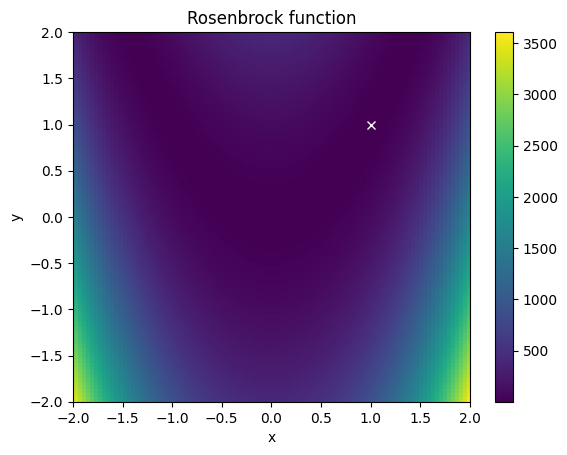

In [ ]:
x, y = np.mgrid[-2:2:100j, -2:2:100j]
plt.pcolor(x, y, optimize.rosen([x, y]))
plt.plot(1, 1, 'xw')
plt.colorbar()
plt.axis([-2, 2, -2, 2])
plt.title('Rosenbrock function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

For the next examples, we are going to use it as a 2D function, with a global minimum found at (1,1).

Initial guess:

In [ ]:
x0 = (0., 0.)

**Gradient-less optimization**

Nelder-Mead and Powell methods are used to minimize functions without the knowledge of the derivative of the function, or gradient.

Nelder-Mead method, also known as downhill simplex is an heuristics method to converge in a non-stationary point:


In [ ]:
optimize.minimize(optimize.rosen, x0, method='Nelder-Mead')

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.6861769151759075e-10
             x: [ 1.000e+00  1.000e+00]
           nit: 79
          nfev: 146
 final_simplex: (array([[ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  9.999e-01],
                       [ 1.000e+00,  1.000e+00]]), array([ 3.686e-10,  1.636e-09,  2.022e-09]))

Powel's conjugate direction method is an algorithm where the minimization is achieved by the displacement of vectors by a search for a lower point:

In [ ]:
optimize.minimize(optimize.rosen, x0, method='Powell')

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.9721522630525295e-31
       x: [ 1.000e+00  1.000e+00]
     nit: 16
   direc: [[ 1.548e-02  3.245e-02]
           [ 1.336e-06  2.539e-06]]
    nfev: 423

As we can see in this case, Powell's method finds the minimum in less steps (iterations, key nit), but with more function evaluations than Nelder-Mead method. Modifying the initial direction of the vectors we may get a better result with less function evaluations. Let's try setting and initial direction of (1,0) from our initial guess, (0,0):

In [ ]:
optimize.minimize(
    optimize.rosen, x0, method='Powell', options={'direc': (1, 0)})

<ipython-input-6-b3a91e4a6956>:1: OptimizeWarning: direc input is not full rank, some parameters may not be optimized
  optimize.minimize(


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [ 1.000e+00  1.000e+00]
     nit: 2
   direc: [ 1.000e+00  0.000e+00]
    nfev: 26

We'll find the minimum in considerably less function evaluations of the different points.

Sometimes we can use gradient methods, like BFGS, without knowing the gradient:

In [ ]:
optimize.minimize(optimize.rosen, x0, method='BFGS')

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.8439915001532524e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 19
      jac: [ 3.987e-06 -2.844e-06]
 hess_inv: [[ 4.948e-01  9.896e-01]
            [ 9.896e-01  1.984e+00]]
     nfev: 72
     njev: 24

**Gradient-based optimization**

These methods will need the derivatives of the cost function, in the case of the Rosenbrock function, the derivative is provided by Scipy, anyway, here's the simple calculation

In [ ]:
def rosen():
  r=(1-x)^2 + 100*(y-x^2)^2;
  return r

In [ ]:
def rosen_d():
  r=[-400*x*(y-x^2)-2*(1-x),200*(y-x^2)];
  return r

Conjugate gradient method is similar to a simpler gradient descent but it uses a conjugate vector and in each iteration the vector moves in a direction conjugate to the all previous steps:

In [ ]:
optimize.minimize(optimize.rosen, x0, method='CG', jac=optimize.rosen_der)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 6.317906212824002e-11
       x: [ 1.000e+00  1.000e+00]
     nit: 18
     jac: [-6.807e-06 -4.542e-06]
    nfev: 42
    njev: 42

BFGS calculates an approximation of the hessian of the objective function in each iteration, for that reason it is a Quasi-Newton method (more on Newton method later):

In [ ]:
optimize.minimize(optimize.rosen, x0, method='BFGS', jac=optimize.rosen_der)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 7.717288356613562e-13
        x: [ 1.000e+00  1.000e+00]
      nit: 19
      jac: [ 3.928e-06 -2.831e-06]
 hess_inv: [[ 4.948e-01  9.895e-01]
            [ 9.895e-01  1.984e+00]]
     nfev: 24
     njev: 24

BFGS achieves the optimization on less evaluations of the cost and jacobian function than the Conjugate gradient method, however the calculation of the hessian can be more expensive than the product of matrices and vectors used in the Conjugate gradient.

L-BFGS is a low-memory aproximation of BFGS. Concretely, the Scipy implementation is L-BFGS-B, which can handle box constraints using the bounds argument:

In [ ]:
optimize.minimize(optimize.rosen,
                  x0,
                  method='L-BFGS-B',
                  jac=optimize.rosen_der)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.0433892998247468e-13
        x: [ 1.000e+00  1.000e+00]
      nit: 21
      jac: [ 4.740e-06 -2.664e-06]
     nfev: 25
     njev: 25
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

If you got the Hessian, you can use it !!!!

In [ ]:
pip install scipydirect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scipydirect: filename=scipydirect-1.4-cp310-cp310-linux_x86_64.whl size=131918 sha256=d5304b1b3fcbdb80af616fb366197a756509c1760157e35210cd80481f0cc203
  Stored in directory: /root/.cache/pip/wheels/7f/80/5c/dcdf9702fda07d3d2a37dd365a872e3a426f997193a62e6e69
Successfully built scipydirect


In [ ]:
from scipydirect import minimize

In [ ]:
def obj(x):
#Six-hump camelback function
  x1 = x[0]
  x2 = x[1]
  f = (4 - 2.1*(x1*x1) + (x1*x1*x1*x1)/3.0)*(x1*x1) + x1*x2 + (-4 + 4*(x2*x2))*(x2*x2)
  return f



In [ ]:
 bounds = [(-3, 3), (-2, 2)]
 res = minimize(obj, bounds)
 print(res.x)
 print(res.fun)

[ 0.08992532 -0.71269624]
-1.0316284167606415


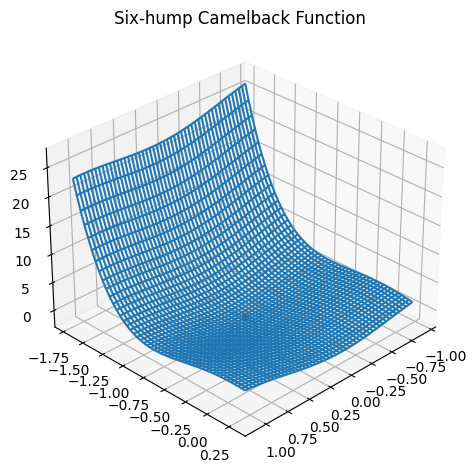

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#
# Plot the results.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = res.x
X, Y = np.mgrid[x[0]-1:x[0]+1:50j, x[1]-1:x[1]+1:50j]
Z = np.zeros_like(X)

for i in range(X.size):
    Z.ravel()[i] = obj([X.flatten()[i], Y.flatten()[i]])

ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.scatter(x[0], x[1], res.fun, c='r', marker='o')
ax.set_title('Six-hump Camelback Function')
ax.view_init(30, 45)
fig.tight_layout()
plt.show()

CHALLENGE \#2 Reformulate the problem

$$
\begin{aligned}
& \min _x f(x)=\left(x_1-3\right)^2+\left(x_2-3\right)^2 \\
& \text { subject to } \\
& h(x)=x_1+x_2-4=0
\end{aligned}
$$

to an unconstrained optimization problem using penalization.

$$
\begin{aligned}
& P(x, R)=f(x)+\Omega(R, g(x), h(x)) \\
& \Omega=R h_j^2(x)
\end{aligned}
$$


$$
\text { find } x 1^*, x 2^* \text { for } R=\left[10,100,1000,10000,10^{\wedge} 5\right]
$$


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the penalized objective function
def penalized_objective(x, R):
    x1, x2 = x
    f = (x1 - 3)**2 + (x2 - 3)**2  # original objective function
    h = (x1 + x2 - 4)**2  # constraint penalty term
    return f + R * h

# Values of R to test
R_values = [10, 100, 1000, 10000, 10**5]

# Initial guess for x1 and x2
initial_guess = [0, 0]

# Store results for each R
results = {}

# Optimize for each R
for R in R_values:
    result = minimize(penalized_objective, initial_guess, args=(R), method='BFGS')
    results[R] = result.x  # Store the optimal values of x1 and x2

results


{10: array([2.04761909, 2.04761909]),
 100: array([2.00497512, 2.00497512]),
 1000: array([2.00049975, 2.00049975]),
 10000: array([2.00004999, 2.00004999]),
 100000: array([2.000005, 2.000005])}

The optimal values of $x_1^*$ and $x_2^*$ for different values of the penalty parameter $R$ are:

$$
\begin{aligned}
& R=10: x_1^*=2.0476, \quad x_2^*=2.0476 \\
& R=100: x_1^*=2.0050, \quad x_2^*=2.0050 \\
& R=1000: x_1^*=2.0005, \quad x_2^*=2.0005 \\
& R=10000: x_1^*=2.00005, \quad x_2^*=2.00005 \\
& R=100000: x_1^*=2.000005, \quad x_2^*=2.000005
\end{aligned}
$$


As $R$ increases, the values of $x_1^*$ and $x_2^*$ approach 2, which satisfies the constraint $x_1+x_2=4$. This confirms that the penalization method enforces the constraint as $R$ becomes large. [^-]